In [1]:
import pandas as pd 
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
df_channels = pd.read_csv('df_channels_en.tsv', sep='\t')

In [4]:
filtered_df_sport_category = pd.read_parquet('filtered_sport_category_without_description_column_metadata.parquet')

In [5]:
# Merge the dataframes on the 'channel' column
filtered_df_sport_category = filtered_df_sport_category.merge(df_channels[['channel', 'name_cc']], left_on='channel_id', right_on='channel', how='left')

In [6]:
filtered_df_sport_category['upload_date'] = pd.to_datetime(filtered_df_sport_category['upload_date'])
filtered_df_sport_category['year'] = filtered_df_sport_category['upload_date'].dt.year
filtered_df_sport_category['month'] = filtered_df_sport_category['upload_date'].dt.month
filtered_df_sport_category['day'] = filtered_df_sport_category['upload_date'].dt.day

filtered_df_sport_category.sort_values(by='upload_date', inplace=True)
filtered_df_sport_category.reset_index(drop=True, inplace=True)

Add imaginary time, so we don't need to do a groupby (because there are multiple videos per day)

In [7]:
filtered_df_sport_category['upload_date'] = filtered_df_sport_category.groupby(['year', 'month', 'day']).cumcount()
filtered_df_sport_category['upload_date'] = pd.to_datetime(filtered_df_sport_category[['year', 'month', 'day']]) + pd.to_timedelta(filtered_df_sport_category['upload_date'] % (24 * 60), unit='m')

In [8]:
filtered_df_sport_category

,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,channel,name_cc,year,month,day
0,Sports,UCs0ACZIa1m4ecu2zijr-8Sg,2019-11-02 05:58:49.815667,123.0,VaLXzI92t9M,60,4848.0,"youtube,crazy,stunt,backflip,COBALTGRUV,jumpin...",First Back Flip on Youtube!,2005-05-24 00:00:00,291474.0,UCs0ACZIa1m4ecu2zijr-8Sg,COBALTGRUV,2005,5,24
1,Sports,UCSXWt3Q5KZPTo_3Xjh-gkVQ,2019-11-14 00:16:20.587973,275.0,uSMy78BzZ9s,208,4423.0,"Skateboard,Skateboarding,Skate,trick,tips,Bret...",Skateboard trick tip video,2005-10-27 00:00:00,1700461.0,UCSXWt3Q5KZPTo_3Xjh-gkVQ,Brett Novak,2005,10,27
2,Sports,UCusD6cPVuc9F9m3L50jCNiA,2019-11-11 18:44:52.507502,3.0,mGN9vh0i-zg,58,311.0,skateboarding,nka skatelab part,2005-11-27 00:00:00,12745.0,UCusD6cPVuc9F9m3L50jCNiA,Nka Vids Skateboardi...,2005,11,27
3,Sports,UCSXWt3Q5KZPTo_3Xjh-gkVQ,2019-11-14 00:16:09.611858,79.0,6LgfyUeFlzw,122,6839.0,"Brett,Novak,Tim,Pool,manual,Skateboarding,skat...",Tim Pool - Day at a Chicago Warehouse,2006-01-19 00:00:00,130326.0,UCSXWt3Q5KZPTo_3Xjh-gkVQ,Brett Novak,2006,1,19
4,Sports,UCSXWt3Q5KZPTo_3Xjh-gkVQ,2019-11-14 00:16:08.374187,1.0,5CUUgxH6xcI,109,6.0,"Brett,Novak,Bret,Alex,Lutz,Quality,Skateboardi...",Newer old Alex Lutz footy,2006-01-31 00:00:00,3820.0,UCSXWt3Q5KZPTo_3Xjh-gkVQ,Brett Novak,2006,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4354407,Sports,UCSAys3yHQjH5n8y082xgHNg,2019-10-29 20:15:30.831802,0.0,sFrATmJ5y2s,1093,19.0,"Jim Cornette,Monday Nitro,WCW,Conrad Thompson,...",Tony Schiavone Calls Vader vs Dustin Rhodes f...,2019-10-28 00:01:00,335.0,UCSAys3yHQjH5n8y082xgHNg,What Happened When,2019,10,28
4354408,Sports,UC650u4npJNtyVbBGscP3Zfg,2019-11-20 22:24:26.555035,1.0,NNZlaGACKyg,1390,100.0,"Realtree,chasing november,chasing november 201...","S4E23: Holiday Buck Success, Missouri Bow Buck",2019-10-29 00:00:00,8702.0,UC650u4npJNtyVbBGscP3Zfg,RealtreeOutdoors,2019,10,29
4354409,Sports,UC650u4npJNtyVbBGscP3Zfg,2019-11-20 22:24:25.927339,4.0,ch1iLWBZ9CA,1464,98.0,"Realtree,hunting,bill jordan,camouflage,huntin...","S4E24: New Years Day Success, Season’s Finale",2019-10-30 00:00:00,5792.0,UC650u4npJNtyVbBGscP3Zfg,RealtreeOutdoors,2019,10,30
4354410,Sports,UCSAys3yHQjH5n8y082xgHNg,2019-11-23 15:34:20.110278,1.0,36w5skJiU78,454,25.0,"Jim Cornette,Monday Nitro,WCW,Conrad Thompson,...",Tony Schiavone calls Alundra Blayze vs Malia H...,2019-11-11 00:00:00,750.0,UCSAys3yHQjH5n8y082xgHNg,What Happened When,2019,11,11


## Analysis

### Word cloud

In [9]:
from wordcloud import WordCloud
from collections import Counter


def create_word_cloud(df, column, split_char=','):
    # Combine all tags into a single list
    all_values_column = [tag for sublist in df[column].str.split(
        split_char).tolist() for tag in sublist]

    # Count the frequency of each tag
    tag_counts = Counter(all_values_column)

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400,
                        background_color='white').generate_from_frequencies(tag_counts)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

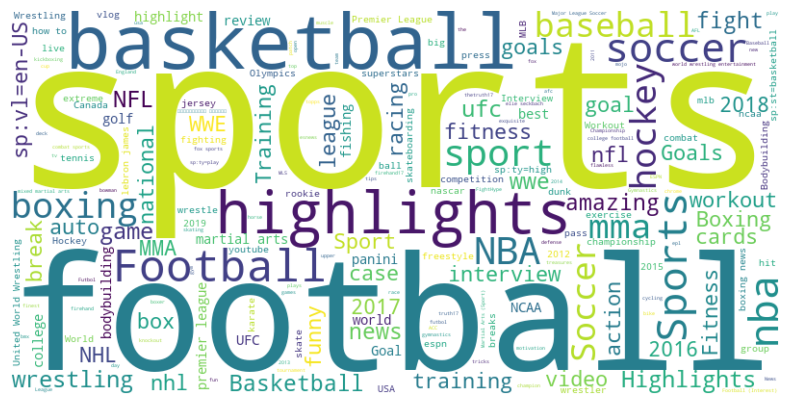

In [10]:
create_word_cloud(filtered_df_sport_category, 'tags', ",")

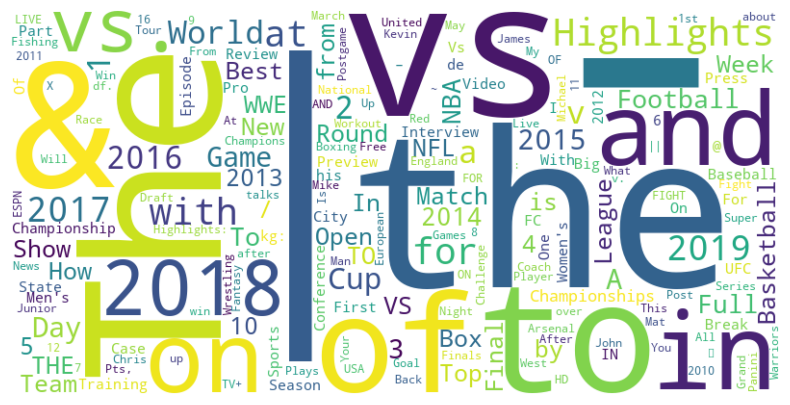

In [11]:
create_word_cloud(filtered_df_sport_category, 'title', " ")

## Graphs

### Graph features throughout the years

In [ ]:
def graph_timeseries_all_time(df, y_column):
    df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

    year_month_view_count = df.groupby('year_month')[y_column].sum().reset_index()

    # Plot the data
    plt.figure(figsize=(40, 12))
    plt.plot(year_month_view_count['year_month'], year_month_view_count[y_column], marker='o')
    plt.title(f'{y_column} Increment Throughout the Years and Months')
    plt.xlabel('Year-Month')
    plt.ylabel(y_column)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

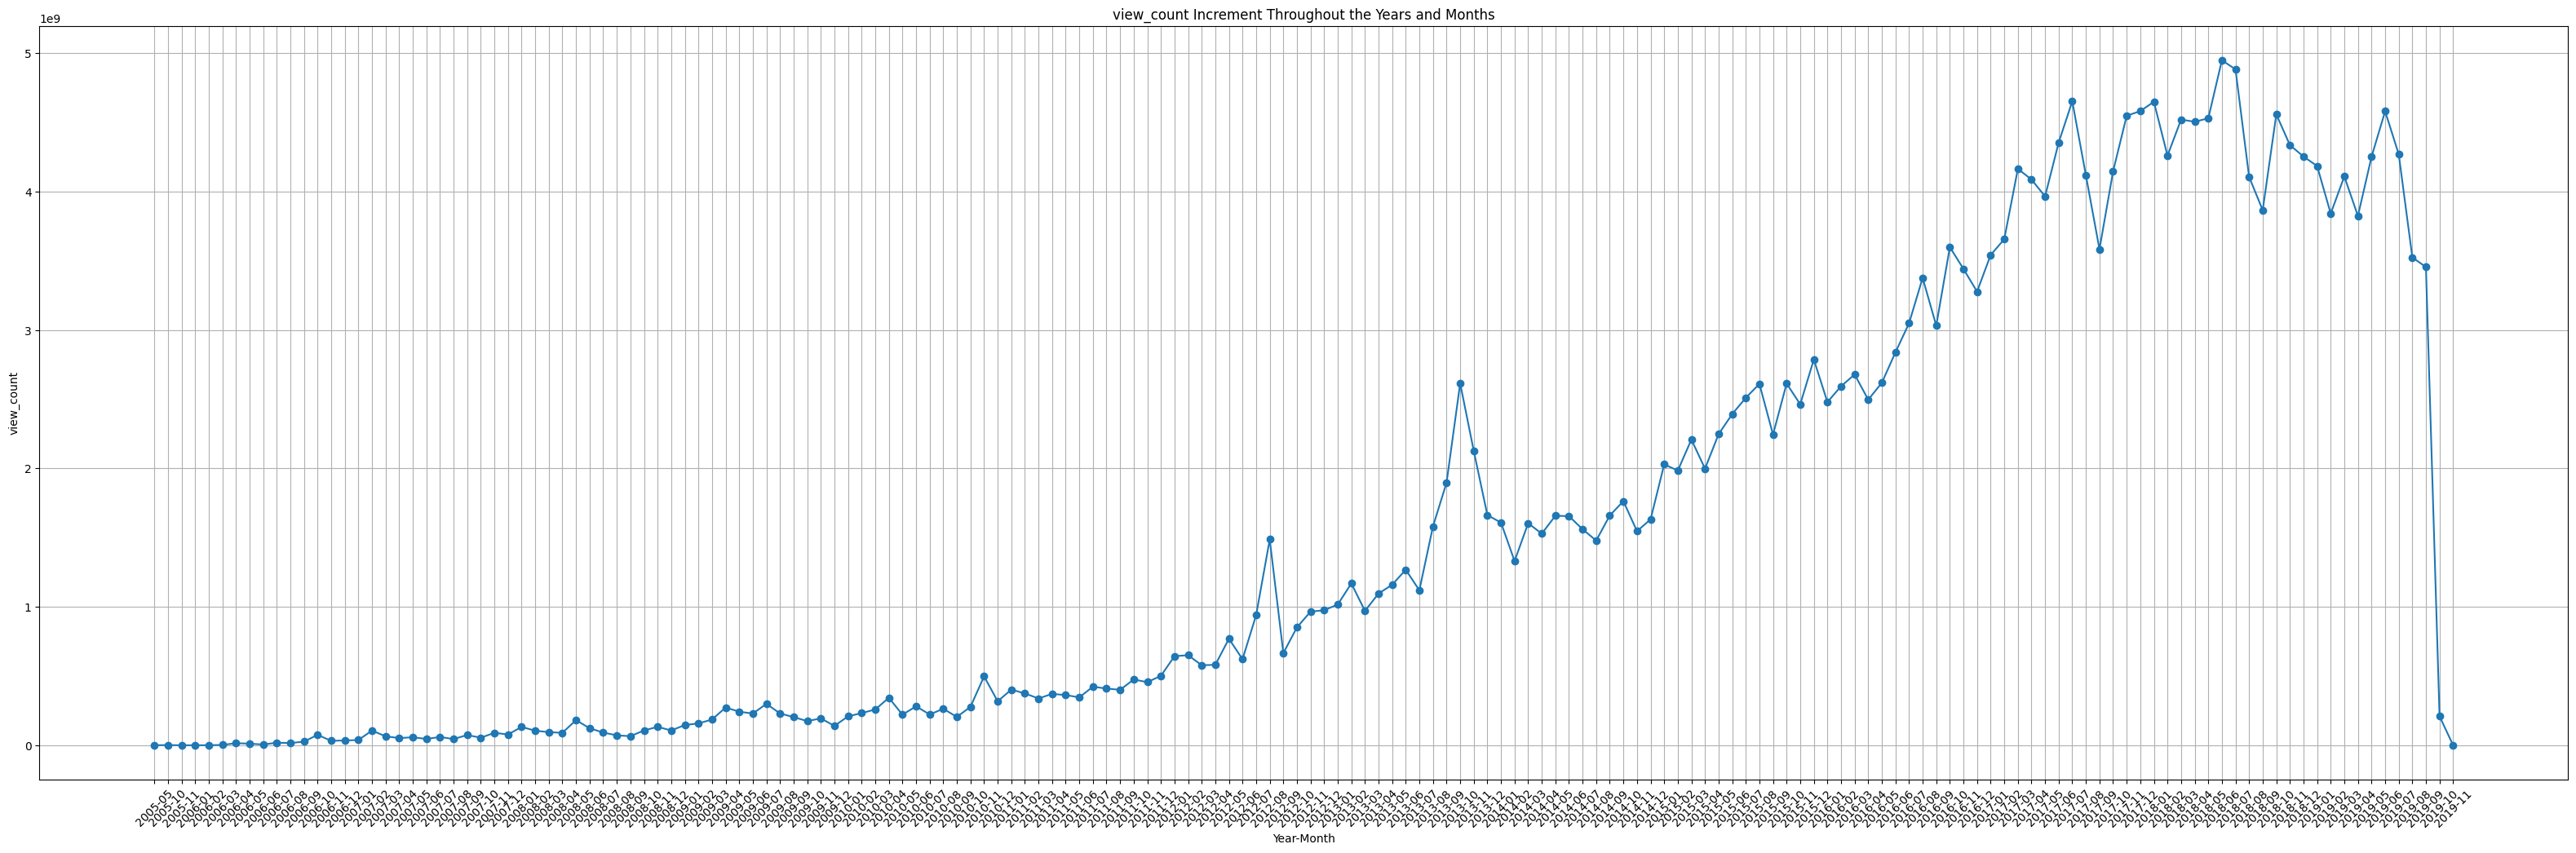

In [38]:
graph_timeseries_all_time(filtered_df_sport_category, 'view_count')

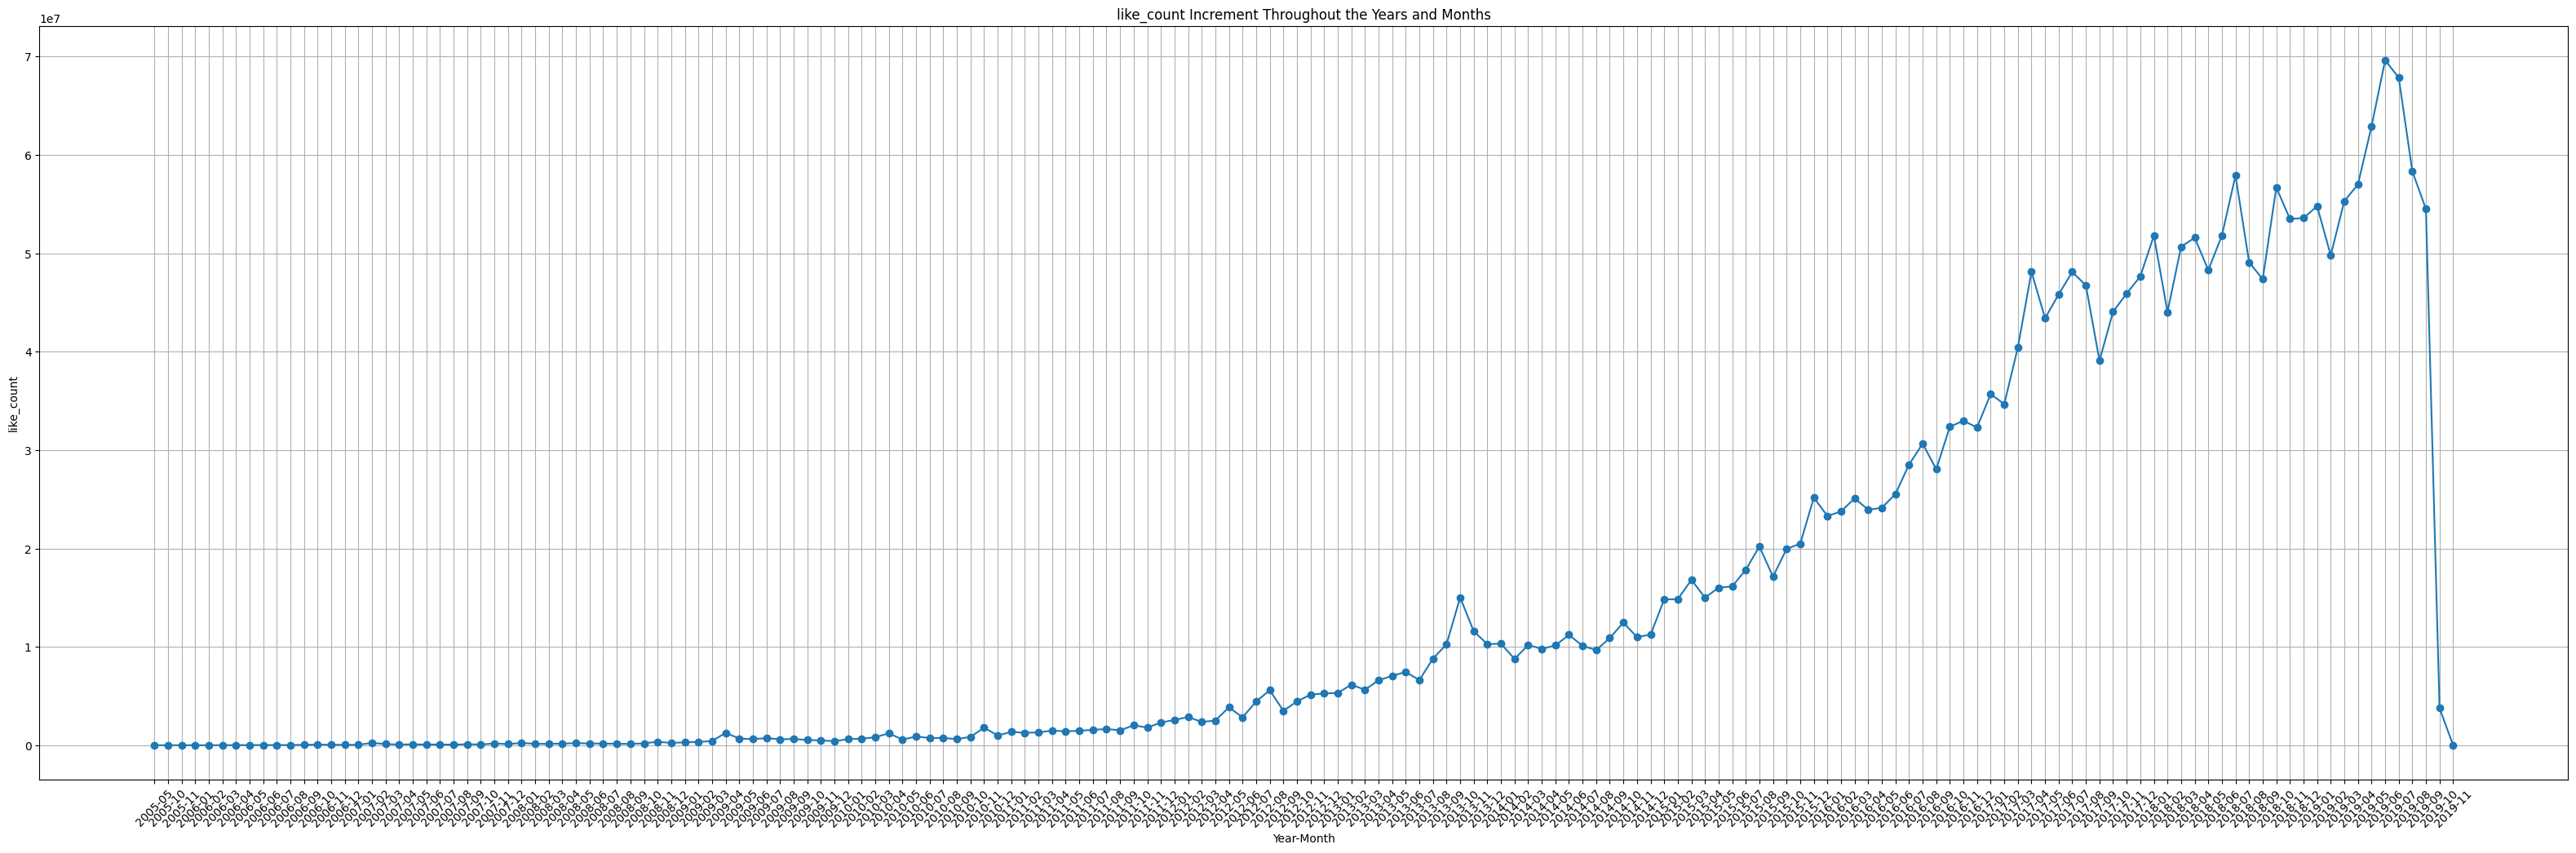

In [41]:
graph_timeseries_all_time(filtered_df_sport_category, 'like_count')

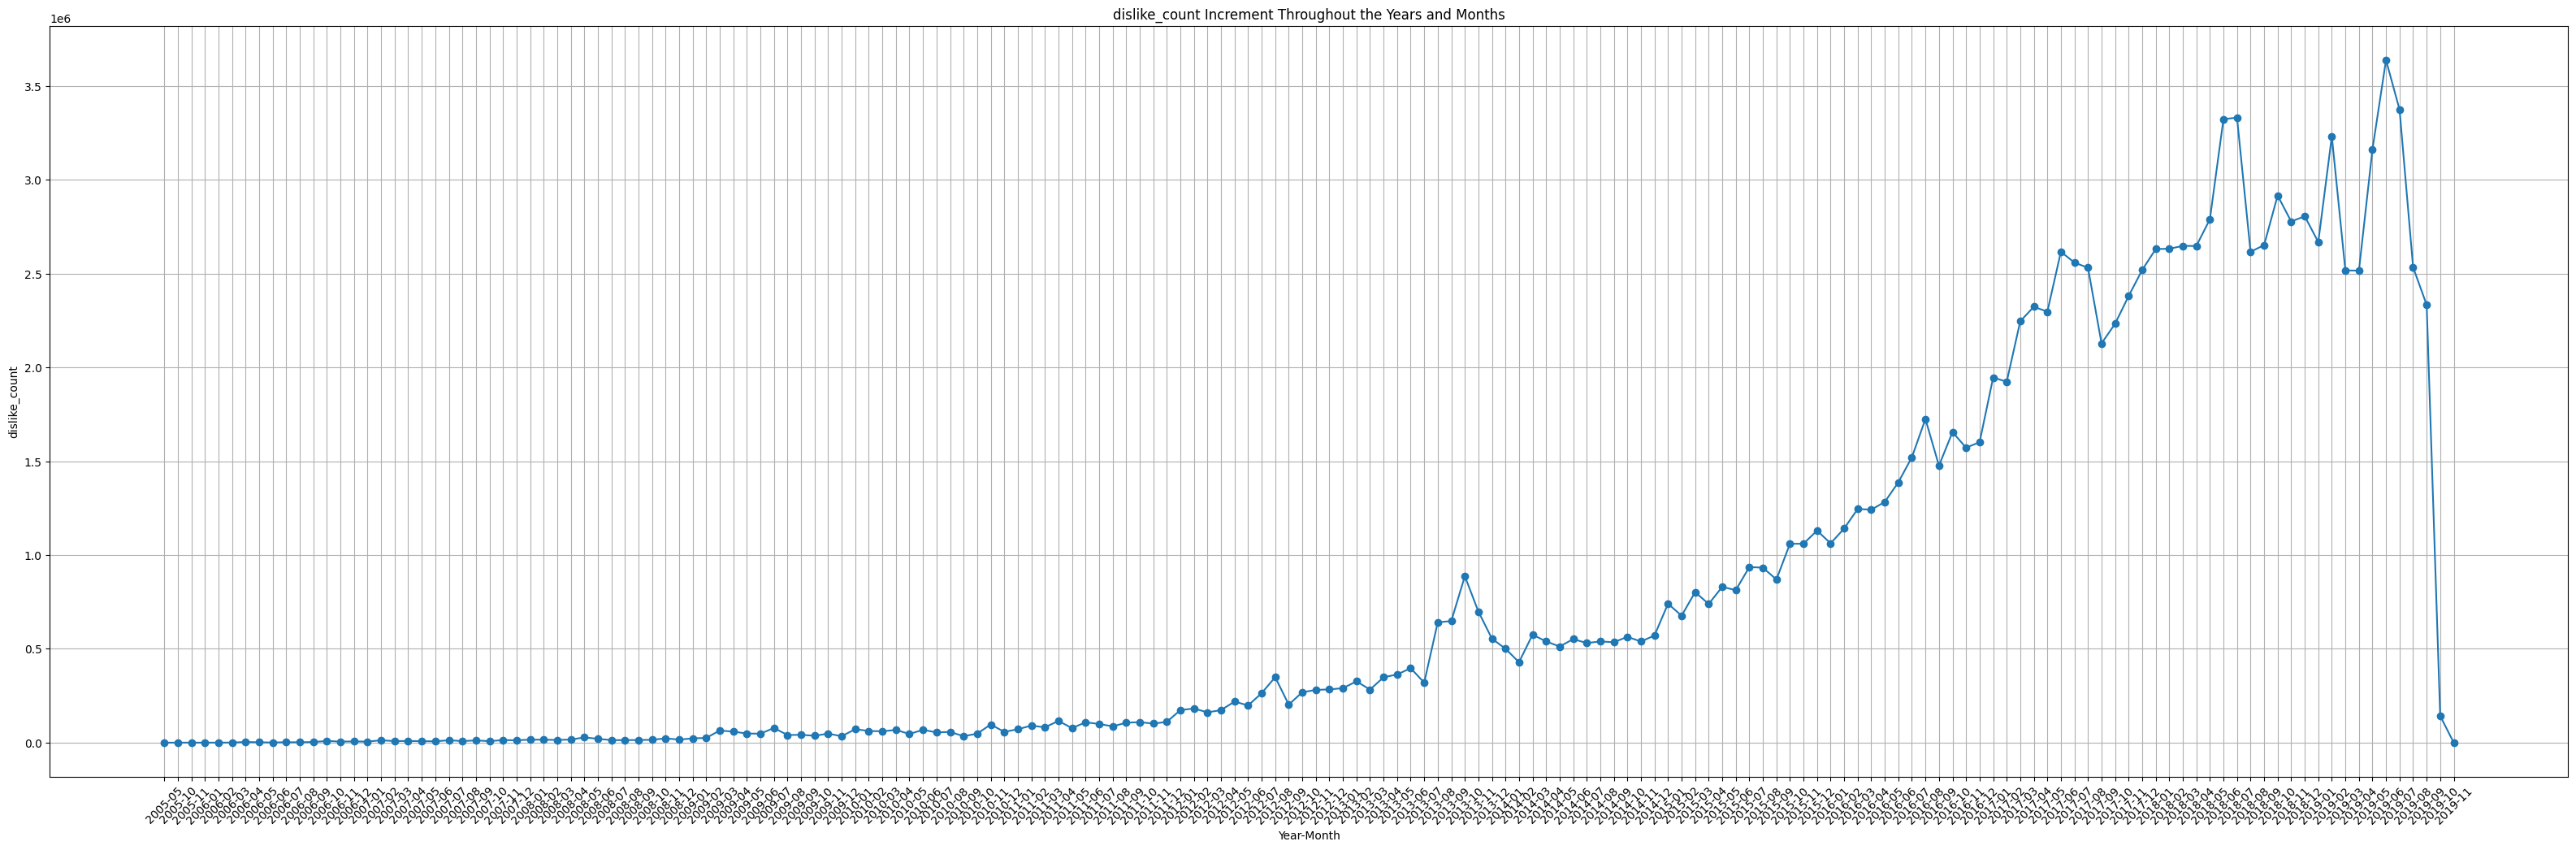

In [42]:
graph_timeseries_all_time(filtered_df_sport_category, 'dislike_count')

### Graph total amount of videos per day throughout the years

In [46]:
def graph_amount_of_videos_timeseries_all_time(df):
    df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

    year_month_video_count = df.groupby('year_month').size().reset_index(name='video_count').copy()

    # Plot the data
    plt.figure(figsize=(40, 12))
    plt.plot(year_month_video_count['year_month'], year_month_video_count['video_count'], marker='o')
    plt.title('Total Amount of Videos Throughout the Years and Months')
    plt.xlabel('Year-Month')
    plt.ylabel('Total Videos')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

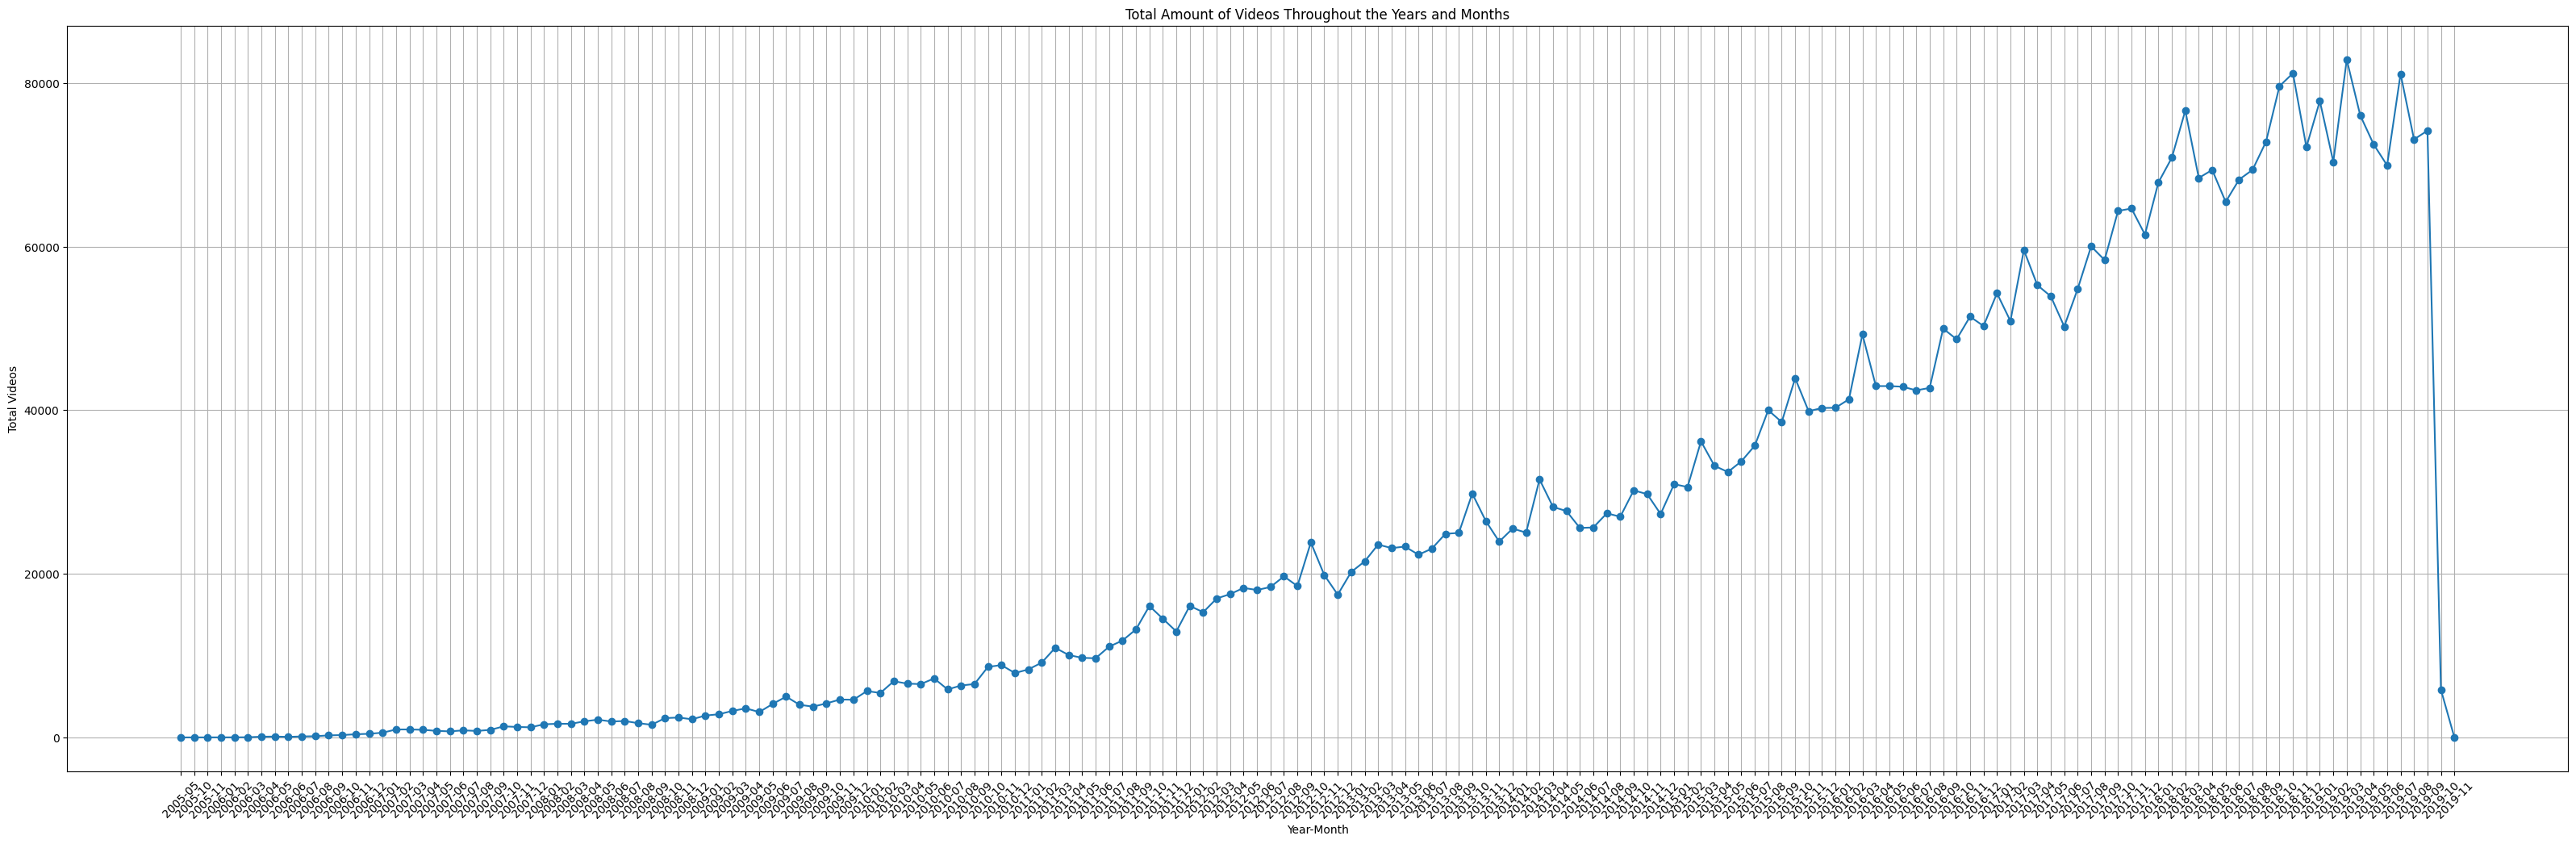

In [47]:
graph_amount_of_videos_timeseries_all_time(filtered_df_sport_category)

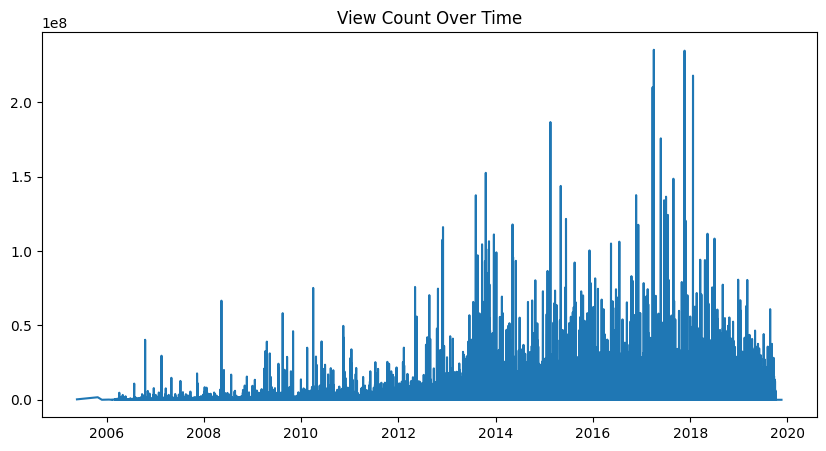

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(filtered_df_sport_category['upload_date'], filtered_df_sport_category['view_count'])
plt.title('View Count Over Time')
plt.show()

### Graph by year

In [14]:
def graph_groupby_time(df):
    # Group by year, month, day, and time and sum the view counts
    grouped_df = df.groupby(df['upload_date'].dt.floor('H'))['view_count'].sum().reset_index()

    # Pivot the table to have years as columns and months/days as rows
    pivot_df = grouped_df.pivot_table(index=grouped_df['upload_date'].dt.strftime('%m-%d %H:%M'), columns=grouped_df['upload_date'].dt.year, values='view_count', fill_value=0)

    # Plot the data
    pivot_df.plot(kind='line', figsize=(15, 8))
    plt.title('Amount of Views by Year, Month, Day, and Time')
    plt.xlabel('Month-Day Hour:Minute')
    plt.ylabel('View Count')
    plt.legend(title='Year')
    plt.show()

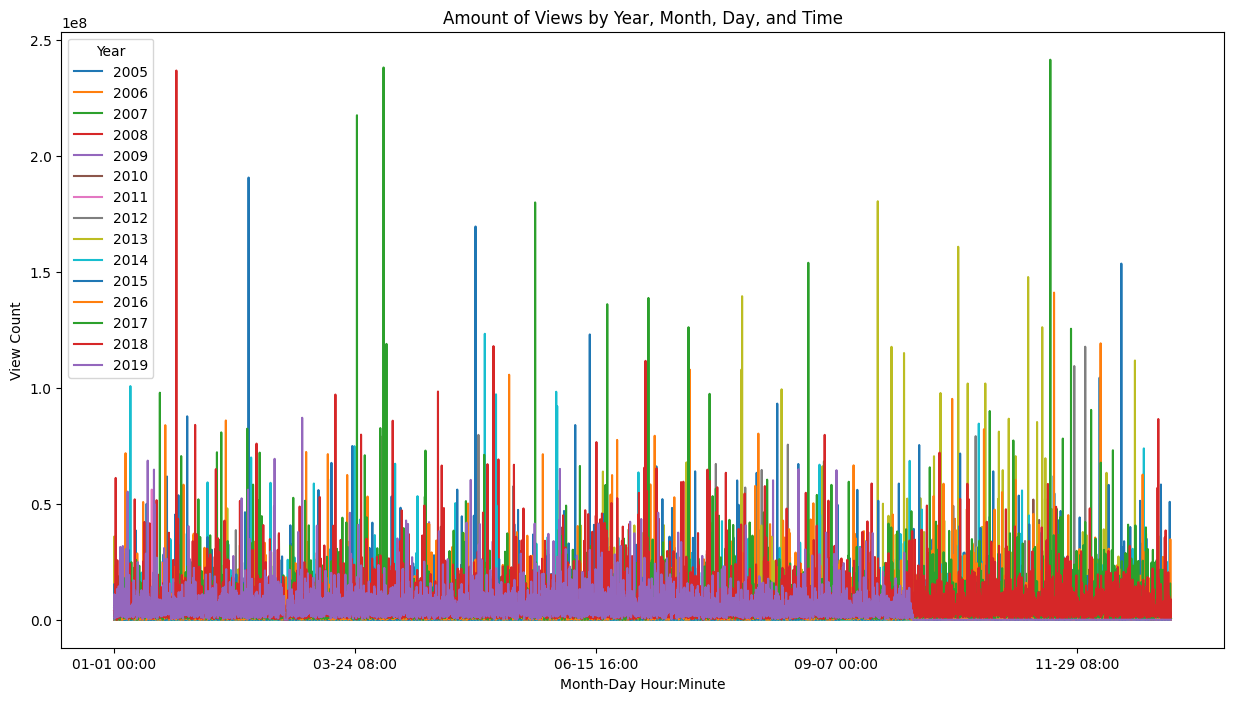

In [15]:
graph_groupby_time(filtered_df_sport_category)

### Graph showing in which days in each year we have the most amount of views

      year  month_day_time   view_count                                                                                                 title
0     2005  10-27 00:00:00    1700461.0                                                                            Skateboard trick tip video
1     2005  10-27 00:00:00    1700461.0                                                            Girls Team in Brazil: Part 3 | Surf | VANS
2     2005  10-27 00:00:00    1700461.0                                                                              Lake Gregory 10K 8/11/07
3     2005  10-27 00:00:00    1700461.0                                                                                How to tame your ropes
4     2005  10-27 00:00:00    1700461.0                                                                                  PR Longboarding Pt.3
5     2005  10-27 00:00:00    1700461.0                                                                         Minnesota_Wisconsin W Preview
6     

/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

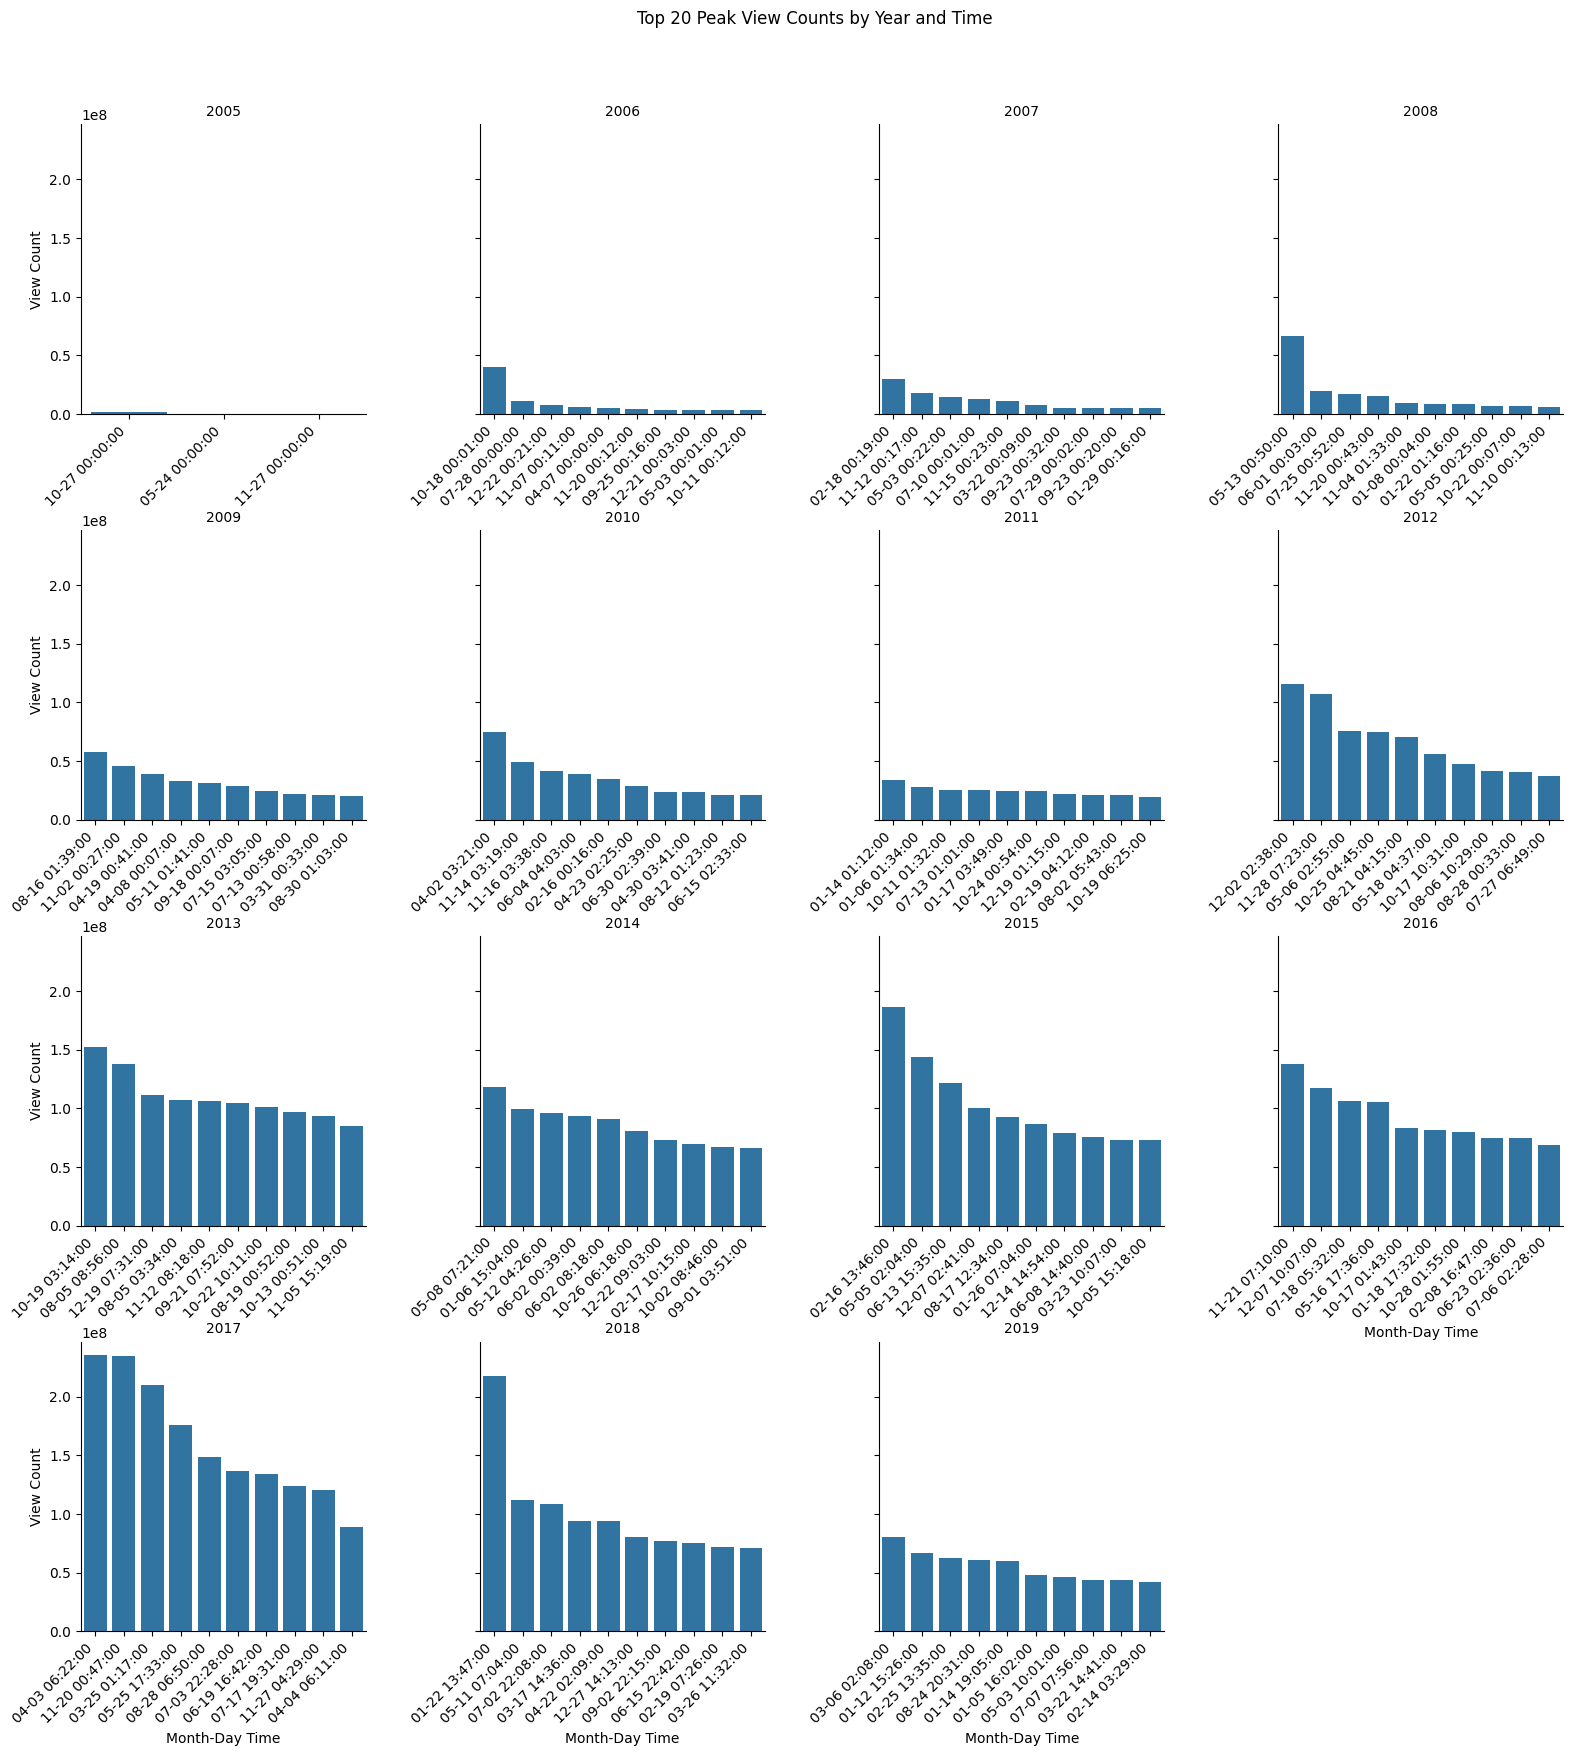

In [ ]:
# Combine month, day, and time (hour:minute:second) into a single column
filtered_df_sport_category['month_day_time'] = filtered_df_sport_category['month'].astype(str).str.zfill(2) + '-' + filtered_df_sport_category['day'].astype(str).str.zfill(2) + ' ' + filtered_df_sport_category['upload_date'].dt.time.astype(str)


year_month_day_time_view_count = filtered_df_sport_category.groupby(['year', 'month_day_time'])['view_count'].sum().reset_index()

# Show the top 20 peak view counts
peak_view_count_by_year_time = year_month_day_time_view_count.groupby('year').apply(lambda x: x.nlargest(10, 'view_count')).reset_index(drop=True)

peak_view_count_with_titles = peak_view_count_by_year_time.merge(filtered_df_sport_category[['month_day_time', 'title']], on='month_day_time', how='left')


print(peak_view_count_with_titles[['year', 'month_day_time', 'view_count', 'title']].to_string())


# Plot
g = sns.FacetGrid(peak_view_count_by_year_time, col="year", col_wrap=4, height=4, sharex=False)
g.map_dataframe(sns.barplot, x='month_day_time', y='view_count')
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
g.set_axis_labels("Month-Day Time", "View Count")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')
g.fig.subplots_adjust(hspace=0.4, wspace=0.4)
g.fig.suptitle('Top 20 Peak View Counts by Year and Time', y=1.05)
plt.show()

## Pie chart general information

In [35]:
def pie_chart(df, top_n, x_column, y_column):
    channel_views = df.groupby(x_column)[y_column].sum()

    # Select the top N channels
    top_channels = channel_views.nlargest(top_n)

    # Plot
    top_channels_df = top_channels.reset_index()
    top_channels_df.columns = [x_column, y_column]
    plt.figure(figsize=(10, 10))
    plt.pie(top_channels_df[y_column] / 1_000_000, labels=top_channels_df[x_column], autopct=lambda p: f'{p:.1f}%\n({p*top_channels_df[y_column].sum()/100/1_000_000:.1f}M)', startangle=140, pctdistance=0.85)
    plt.title(f'Total Amount of {y_column} by Top {top_n} {x_column}')
    plt.ylabel('')
    plt.legend()
    plt.show()

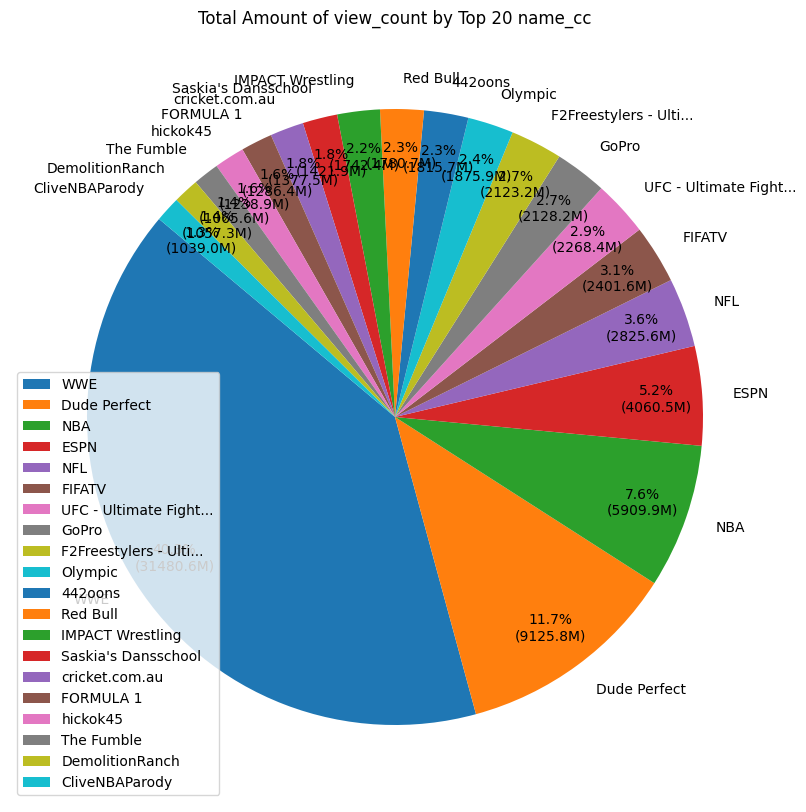

In [36]:
pie_chart(filtered_df_sport_category, 20, 'name_cc', 'view_count')

Same channels and almost same amount of views like in timeseries dataset